### Decision Tree Regressor

In [27]:
#Import python libraries/packages

# Pandas to handle dataframes
import pandas as pd    

# Import Scikit-Learn library for the regression model
import sklearn   
from sklearn import preprocessing #sklearn for normalization function
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Import numpy 
import numpy as np

# Import plotting libraries
import matplotlib 
from matplotlib import pyplot as plt
# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 18})

In [28]:
# Open and load dataset
bacterial_csv = pd.read_csv('compiled_features_complete.csv')
df = pd.DataFrame(data=bacterial_csv)
df

,Unnamed: 0,GENENAME,ORG,ENTREZID,REFSEQ,LOG2FC,True_EID,SEQUENCE,AA_NP,AA_POS,AA_POL,AA_NEG,MW,AROM,ISO_E
0,0,ABC_transporter,PA,879411,NP_248876,-0.038469,15595384,mkaltssllglfaapvlagllgayvplasaappkeiriavpdvsag...,59.773371,11.614731,17.847025,10.764873,37193.0756,0.070822,6.871061
1,1,ABC_transporter,PA,883108,NP_248894,-0.207718,15595400,mhqriasiglgltlalggsaqaagqlnvvswsgyfspqllekfeke...,54.941860,11.337209,22.674419,11.046512,37859.8560,0.093023,6.033937
2,2,ABC_transporter,PA,878380,NP_249014,-0.187309,15595520,mtyrtpltllfaaglalggqaraegtlhfanwsdyyppellkkfek...,52.449568,14.121037,20.461095,12.968300,38901.0268,0.112392,6.350359
3,3,ABC_transporter,PA,880771,NP_249293,0.085173,15595799,mlpamrtgllcallgvtapawaeyvtvisfggankeaqetafykpf...,59.593023,11.918605,17.732558,10.755814,37832.8132,0.116279,6.919602
4,4,ABC_transporter,PA,879023,NP_249295,0.038834,15595801,mskslkaaslkfatlaaglacaaqamavdltvvsfgganksaqika...,54.310345,11.494253,22.413793,11.781609,38166.9526,0.112069,5.869103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,431,RNA_polymerase,BS,939937,NP_388354,-0.055848,728883360,mtqpskttkltkdevdrlisdyqtkqdeqaqetlvrvytnlvdmla...,42.748092,16.030534,24.809160,16.412214,29900.8971,0.049618,5.545803
432,432,RNA_polymerase,BS,936362,NP_391300,-0.140629,728886343,mdmklqqvqvlkpqltqelrqaitllgyhsaelaeyidelslenpl...,43.807339,15.596330,27.752294,12.844037,49700.0669,0.064220,7.716086
433,433,RNA_polymerase,BS,938729,NP_390226,-0.528350,728885268,mdvevkkngknaqlkdhevkelikqsqngdqqardllieknmrlvw...,43.137255,16.862745,21.568627,18.431373,29372.0675,0.058824,5.252059
434,434,RNA_polymerase,BS,939953,NP_389416,0.303125,728884442,msrnkveicgvdtsklpvlkneemrklfrqlqdegddsareklvng...,45.384615,16.153846,21.923077,16.538462,30073.0463,0.061538,5.632312


In [29]:
#assign input (X) /output (y) features
X= df[['AA_NP','AA_POS','AA_NEG', 'AA_POL', 'MW', 'AROM', 'ISO_E']]
y= df['LOG2FC']

#Change as you decrease/select input features!!
#Nfeat is number of input features
Nfeat = X.shape[1]

#### Scale input features (Rory will write a function, need to implement later)
for now just do a jupyter notebook lines

In [30]:
X_arr = X.values #returns a numpy array for X (needed to use the min_max_scaler)

X_col_names = list(X.columns.values.tolist()) #get column names to then put back into X_norm

#min-max normalization (rescaling) of input features
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_arr)
X_norm= pd.DataFrame(X_scaled)

#put back the original column names
X_norm.columns = X_col_names

X = X_norm

In [31]:
X

,AA_NP,AA_POS,AA_NEG,AA_POL,MW,AROM,ISO_E
0,0.560010,0.473362,0.223260,0.250886,0.208999,0.329985,0.380891
1,0.452176,0.457427,0.231083,0.387387,0.213203,0.452431,0.267864
2,0.396551,0.617272,0.284465,0.324803,0.219767,0.559252,0.310587
3,0.555985,0.490810,0.223009,0.247650,0.213032,0.580691,0.387445
4,0.438081,0.466444,0.251502,0.380018,0.215139,0.557471,0.245608
...,...,...,...,...,...,...,...
431,0.180024,0.726915,0.380126,0.447750,0.163027,0.213046,0.201957
432,0.203666,0.701983,0.281013,0.530971,0.287848,0.293578,0.494985
433,0.188710,0.774700,0.436212,0.356120,0.159693,0.263815,0.162296
434,0.238869,0.733995,0.383633,0.366142,0.164112,0.278788,0.213637


#### Function to do multiple linear regression with decision tree regressor (DTR)
multilinregr_DTR(test_ratio, seed_random):

In [60]:
def multilinregr_DTR(test_ratio, seed_random,n_depth, X, y):
#takes in data split ratio and random state seed
#returning the split X and y, as well as the predicted output
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=seed_random, shuffle=True)
    #Model is Decision Tree Regressor
    model = DecisionTreeRegressor(max_depth=n_depth)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    score_DTR = model.score(X_train, y_train)
           
    return X_train, X_test, y_train, y_test, y_predict, score_DTR

In [76]:
#output from function:

test_ratio = 0.30
seed_random = 42
n_depth = 100

X_train, X_test, y_train, y_test, y_predict, score_DTR = multilinregr_DTR(test_ratio, seed_random, n_depth, X, y)

In [77]:
#Evaluate the model performance

#score of the model (DTR)
print("score Decision Tree Reg: %.2f" % score_DTR.mean()) 

# Calculate mean squared error
print('Multiple linear regression MSE: %.2f' % mean_squared_error(y_test, y_predict))

#calculate R^2 value (best value = 1, negative if we have huge error)
print('Coefficient of determination (R^2 value): %.2f' % r2_score(y_test, y_predict))


score Decision Tree Reg: 1.00
Multiple linear regression MSE: 0.15
Coefficient of determination (R^2 value): -1.07


#### if run without function:

In [50]:
#split train:test dataset 80%:20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
#Define method and fit to the train set

#Model is Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=10)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [ ]:
#Evaluate model and report performance

# compute the score on the Decision Tree Regressor model
score_DTR = model.score(X_train, y_train)
print("score Decision Tree Reg: %.2f" % score_DTR.mean()) 

# Calculate mean squared error
print('Multiple linear regression MSE: %.2f' % mean_squared_error(y_test, y_predict))

#calculate R^2 value (best value = 1, negative if we have huge error)
print('Coefficient of determination (R^2 value): %.2f' % r2_score(y_test, y_predict))


#### Check y_test and y_predict per input features

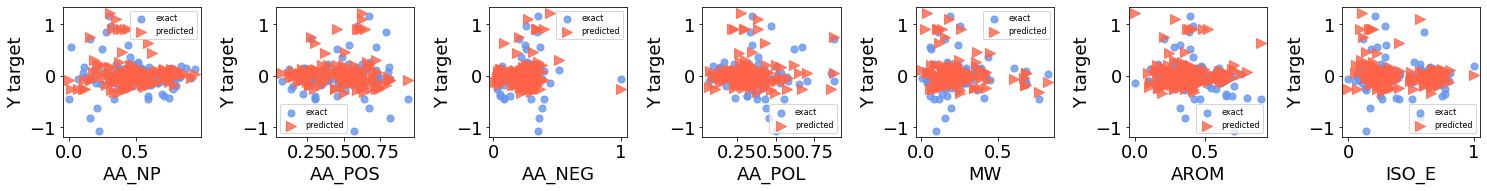

In [78]:
# Plot LogFC output feature per input feature
feature_names = np.array(list(X.columns))
fig, ax = plt.subplots(1,Nfeat,figsize=(Nfeat*3,3))
for i in range(Nfeat):
  
    ax[i].scatter(X_test.iloc[:,i], y_test, s=50, marker='o', color="cornflowerblue", alpha=0.8, label="exact")
    ax[i].scatter(X_test.iloc[:,i], y_predict, s=100, marker='>', color="tomato", alpha=0.8, label="predicted")
    ax[i].set_xlabel(feature_names[i])
    ax[i].set_ylabel('Y target')
    ax[i].legend(fontsize=8)

plt.tight_layout()

In [79]:
def plot_prediction(y_test, y_predict):
#the function will plot prediction and test output data
#to see how acurrate the prediction data are
    x_ax = range(len(y_test))
    plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
    plt.plot(x_ax, y_predict, lw=0.8, color="red", label="predicted")
    plt.legend(loc='upper right', prop={'size': 10})
    plt.show()

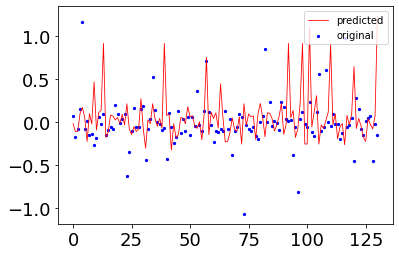

In [80]:
#visualize the original and predicted test data in a plot
plot_pred = plot_prediction(y_test, y_predict)

#### If MSE is high, can change max_depth and check MSE for each depth

In [46]:
# Fit regression model using Decision Tree Regressor
# Change max depth, calculate score and MSE in a list
#create a function to iterate over a for-loop and generate MSE's in a list


def change_max_depth(md_list):
    #Function takes a list of different max_depth values and collect their MSE in a list
    MSE_list = []
    for i in range(len(md_list)):
        regr = DecisionTreeRegressor(max_depth=md_list[i])
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        MSE_temp = mean_squared_error(y_test, y_pred)
        MSE_list.append(MSE_temp)
    
    return MSE_list

[0.08864131498414252, 0.12296739504590372, 0.1258089214281268, 0.11039303840112162, 0.12072527507702714, 0.12698049775768958, 0.12821961278591823, 0.12221880368224748]


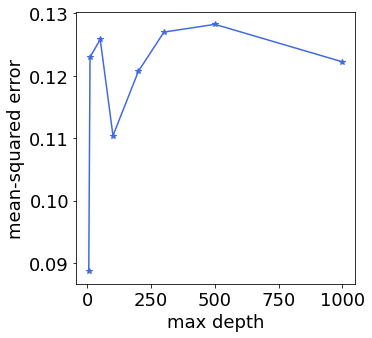

In [47]:
max_depth = [5,10,50,100,200,300,500,1000]
MSE_all = change_max_depth(max_depth)
print(MSE_all)

#create plot of MSE and max depth, pick the max_depth with lowest MSE
plt.figure(figsize=(5,5))
plt.plot(max_depth,MSE_all,'-*', color='royalblue')
plt.xlabel('max depth')
plt.ylabel('mean-squared error')
plt.show()